# <span style="font-variant:small-caps;"><font color=#DAA6E4 size=12>Background Estimation</font></span>

This notebook should present the distributions of signal and data within control regions.

In [1]:
from matplotlib.ticker import FormatStrFormatter
import vector

In [2]:
mpl.rcParams['axes.formatter.limits'] = (-4,4)

## 1. Load signal and data events

In [3]:
from utils.fileUtils.sr import NMSSM_MX_450_MY_300, NMSSM_MX_500_MY_300, NMSSM_MX_600_MY_300, NMSSM_MX_600_MY_400, NMSSM_MX_700_MY_300, NMSSM_MX_700_MY_400, NMSSM_MX_700_MY_500

In [4]:
data_tree = Tree(JetHT_Data_UL)

In [5]:
H1_b1 = vector.obj(
    pt=data_tree.t6_jet_pt[data_tree.t6_jet_higgsIdx == 0][:,0], 
    eta=data_tree.t6_jet_eta[data_tree.t6_jet_higgsIdx == 0][:,0], 
    phi=data_tree.t6_jet_phi[data_tree.t6_jet_higgsIdx == 0][:,0], 
    m=data_tree.t6_jet_m[data_tree.t6_jet_higgsIdx == 0][:,0])
H1_b2 = vector.obj(
    pt=data_tree.t6_jet_pt[data_tree.t6_jet_higgsIdx == 0][:,1], 
    eta=data_tree.t6_jet_eta[data_tree.t6_jet_higgsIdx == 0][:,1], 
    phi=data_tree.t6_jet_phi[data_tree.t6_jet_higgsIdx == 0][:,1], 
    m=data_tree.t6_jet_m[data_tree.t6_jet_higgsIdx == 0][:,1])
H2_b1 = vector.obj(
    pt=data_tree.t6_jet_pt[data_tree.t6_jet_higgsIdx == 1][:,0], 
    eta=data_tree.t6_jet_eta[data_tree.t6_jet_higgsIdx == 1][:,0], 
    phi=data_tree.t6_jet_phi[data_tree.t6_jet_higgsIdx == 1][:,0], 
    m=data_tree.t6_jet_m[data_tree.t6_jet_higgsIdx == 1][:,0])
H2_b2 = vector.obj(
    pt=data_tree.t6_jet_pt[data_tree.t6_jet_higgsIdx == 1][:,1], 
    eta=data_tree.t6_jet_eta[data_tree.t6_jet_higgsIdx == 1][:,1], 
    phi=data_tree.t6_jet_phi[data_tree.t6_jet_higgsIdx == 1][:,1], 
    m=data_tree.t6_jet_m[data_tree.t6_jet_higgsIdx == 1][:,1])
H3_b1 = vector.obj(
    pt=data_tree.t6_jet_pt[data_tree.t6_jet_higgsIdx == 2][:,0], 
    eta=data_tree.t6_jet_eta[data_tree.t6_jet_higgsIdx == 2][:,0], 
    phi=data_tree.t6_jet_phi[data_tree.t6_jet_higgsIdx == 2][:,0], 
    m=data_tree.t6_jet_m[data_tree.t6_jet_higgsIdx == 2][:,0])
H3_b2 = vector.obj(
    pt=data_tree.t6_jet_pt[data_tree.t6_jet_higgsIdx == 2][:,1], 
    eta=data_tree.t6_jet_eta[data_tree.t6_jet_higgsIdx == 2][:,1], 
    phi=data_tree.t6_jet_phi[data_tree.t6_jet_higgsIdx == 2][:,1], 
    m=data_tree.t6_jet_m[data_tree.t6_jet_higgsIdx == 2][:,1])

X = H1_b1 + H1_b2 + H2_b1 + H2_b2 + H3_b1 + H3_b2

In [6]:
signal_tree = Tree(NMSSM_MX_450_MY_300)
# signal_tree = Tree(NMSSM_MX_500_MY_300)
# signal_tree = Tree(NMSSM_MX_600_MY_300)
# signal_tree = Tree(NMSSM_MX_600_MY_400)
# signal_tree = Tree(NMSSM_MX_700_MY_300)
# signal_tree = Tree(NMSSM_MX_700_MY_400)
# signal_tree = Tree(NMSSM_MX_700_MY_500)

In [7]:
sgnl_H1_b1 = vector.obj(
    pt=signal_tree.t6_jet_pt[signal_tree.t6_jet_higgsIdx == 0][:,0], 
    eta=signal_tree.t6_jet_eta[signal_tree.t6_jet_higgsIdx == 0][:,0], 
    phi=signal_tree.t6_jet_phi[signal_tree.t6_jet_higgsIdx == 0][:,0], 
    m=signal_tree.t6_jet_m[signal_tree.t6_jet_higgsIdx == 0][:,0])
sgnl_H1_b2 = vector.obj(
    pt=signal_tree.t6_jet_pt[signal_tree.t6_jet_higgsIdx == 0][:,1], 
    eta=signal_tree.t6_jet_eta[signal_tree.t6_jet_higgsIdx == 0][:,1], 
    phi=signal_tree.t6_jet_phi[signal_tree.t6_jet_higgsIdx == 0][:,1], 
    m=signal_tree.t6_jet_m[signal_tree.t6_jet_higgsIdx == 0][:,1])
sgnl_H2_b1 = vector.obj(
    pt=signal_tree.t6_jet_pt[signal_tree.t6_jet_higgsIdx == 1][:,0], 
    eta=signal_tree.t6_jet_eta[signal_tree.t6_jet_higgsIdx == 1][:,0], 
    phi=signal_tree.t6_jet_phi[signal_tree.t6_jet_higgsIdx == 1][:,0], 
    m=signal_tree.t6_jet_m[signal_tree.t6_jet_higgsIdx == 1][:,0])
sgnl_H2_b2 = vector.obj(
    pt=signal_tree.t6_jet_pt[signal_tree.t6_jet_higgsIdx == 1][:,1], 
    eta=signal_tree.t6_jet_eta[signal_tree.t6_jet_higgsIdx == 1][:,1], 
    phi=signal_tree.t6_jet_phi[signal_tree.t6_jet_higgsIdx == 1][:,1], 
    m=signal_tree.t6_jet_m[signal_tree.t6_jet_higgsIdx == 1][:,1])
sgnl_H3_b1 = vector.obj(
    pt=signal_tree.t6_jet_pt[signal_tree.t6_jet_higgsIdx == 2][:,0], 
    eta=signal_tree.t6_jet_eta[signal_tree.t6_jet_higgsIdx == 2][:,0], 
    phi=signal_tree.t6_jet_phi[signal_tree.t6_jet_higgsIdx == 2][:,0], 
    m=signal_tree.t6_jet_m[signal_tree.t6_jet_higgsIdx == 2][:,0])
sgnl_H3_b2 = vector.obj(
    pt=signal_tree.t6_jet_pt[signal_tree.t6_jet_higgsIdx == 2][:,1], 
    eta=signal_tree.t6_jet_eta[signal_tree.t6_jet_higgsIdx == 2][:,1], 
    phi=signal_tree.t6_jet_phi[signal_tree.t6_jet_higgsIdx == 2][:,1], 
    m=signal_tree.t6_jet_m[signal_tree.t6_jet_higgsIdx == 2][:,1])

sgnl_X = sgnl_H1_b1 + sgnl_H1_b2 + sgnl_H2_b1 + sgnl_H2_b2 + sgnl_H3_b1 + sgnl_H3_b2

## 2. Define control regions

Control region definitions:

<span style="font-family:Courier;">SR<sup>hs</sup> = <span style="color:green">pass</span> m<sub>H</sub> veto, <span style="color:green">pass</span> b<sub>sum</sub> veto  
SR<sup>ls</sup> = <span style="color:green">pass</span> m<sub>H</sub> veto, <span style="color:red">fail</span> b<sub>sum</sub> veto  
CR<sup>hs</sup> = <span style="color:red">fail</span> m<sub>H</sub> veto, <span style="color:green">pass</span> b<sub>sum</sub> veto  
CR<sup>ls</sup> = <span style="color:red">fail</span> m<sub>H</sub> veto, <span style="color:red">fail</span> b<sub>sum</sub> veto</span>

### <span style="font-variant:small-caps;"><font size=4>Control Region</font></span>: <font size=3>Thresholds</font>

In [8]:
cut_6jNN = 0.8
mass_veto = 60

### <span style="font-variant:small-caps;"><font size=4>Control Region</font></span>: <font size=3>Masks</font>

In [9]:
### SIGNAL ###
sgnl_6jNN_mask = signal_tree.b_6j_score > cut_6jNN # pass 6jNN mask

# mass veto
sgnl_CR_mask = abs(signal_tree.t6_higgs_m[:,2] - 125) > mass_veto # CR
sgnl_SR_mask = ~sgnl_CR_mask # SR
sgnl_CR = sgnl_6jNN_mask & sgnl_CR_mask
sgnl_SR = sgnl_6jNN_mask & sgnl_SR_mask

In [10]:
#### DATA ####
data_6jNN_mask = data_tree.b_6j_score > cut_6jNN # pass 6jNN mask

# mass veto
data_CR_mask = abs(data_tree.t6_higgs_m[:,2] - 125) > mass_veto # CR
data_CR = data_6jNN_mask & data_CR_mask

## 3. Plot CR vars

Verify control region definition: mass veto.

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


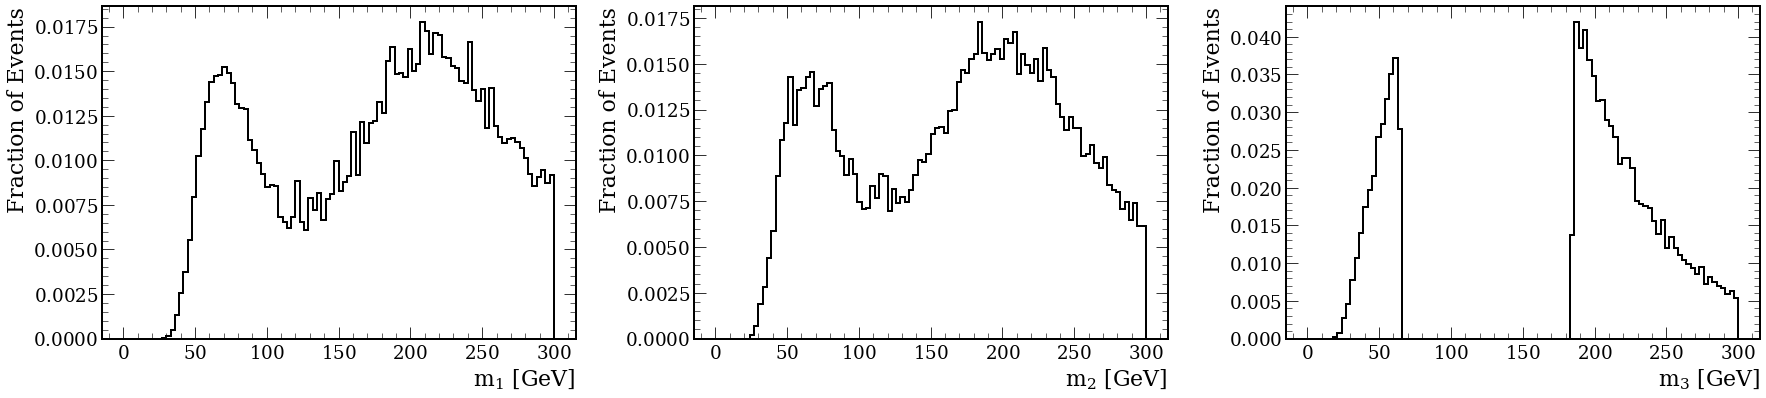

In [11]:
mH_bins = np.linspace(0,300,101)
fig, axs = plt.subplots(figsize=(25,6), nrows=1, ncols=3)

ax = axs[0]
n_CR, b = Hist(data_tree.t6_higgs_m[:,0][data_CR], bins=mH_bins, ax=ax, color='black', density=1)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_xlabel(r'$m_1$ [GeV]')
ax.set_ylabel('Fraction of Events')
# print(n_s.sum()/np.sqrt(n_b.sum()))

ax = axs[1]
n_s, b = Hist(data_tree.t6_higgs_m[:,1][data_CR], bins=mH_bins, ax=ax,color='black', density=1)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_xlabel(r'$m_2$ [GeV]')
ax.set_ylabel('Fraction of Events')

ax = axs[2]
n_s, b = Hist(data_tree.t6_higgs_m[:,2][data_CR], bins=mH_bins, ax=ax, color='black', density=1)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%2.2f'))
ax.set_xlabel(r'$m_3$ [GeV]')
ax.set_ylabel('Fraction of Events')

plt.tight_layout()

fig.savefig(f'plots/data_higgs_mass.pdf')

Investigate control region definition: sum of b-tag score.

In [12]:
sig_sums = ak.sum(signal_tree.t6_jet_btag, axis=1)[sgnl_SR_mask]/6
data_sums = ak.sum(data_tree.t6_jet_btag, axis=1)[data_CR]/6

n_sig, edges = np.histogram(sig_sums.to_numpy(), bins=score_bins)
n_data, edges = np.histogram(data_sums.to_numpy(), bins=score_bins)

In [13]:
sum6_eff = []
sum6_rej = []

for cut in edges[:-1]:
    sum6_eff.append(n_sig[edges[:-1] >= cut].sum()/n_sig.sum())
    sum6_rej.append(n_data[edges[:-1] < cut].sum()/n_data.sum())

sum6_eff = np.append(1, np.asarray(sum6_eff))
sum6_rej = np.asarray(sum6_rej)

dx = sum6_eff[:-1] - sum6_eff[1:]
auc = np.sum(sum6_rej*dx)
sum6_rej = np.append(sum6_rej, 1)

In [14]:
opt_arg = (abs(sum6_eff-auc)+abs(sum6_rej-auc)).argmin()
opt_cut = score_bins[opt_arg]
opt_cut = 0.64

print(f"Optimal score cut = {opt_cut}")

Optimal score cut = 0.64


0.64


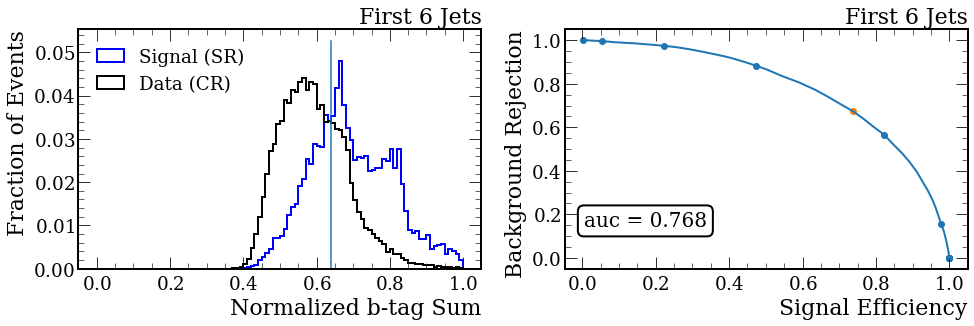

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,5))

# fig.suptitle(signal_tree.sample, x=.85, y=.95)

ax = axs[0]
ax.set_title('First 6 Jets', loc='right')
n_s, edges = Hist(x_bins(score_bins), weights=n_sig/n_sig.sum(), bins=score_bins, ax=ax, label='Signal (SR)', color='blue')
n_data, edges = Hist(x_bins(score_bins), weights=n_data/n_data.sum(), bins=score_bins, ax=ax, label='Data (CR)', color='black')
ax.plot([opt_cut, opt_cut],[0,n_s.max()*1.1])
ax.legend(fontsize='smaller', loc=2)
ax.set_xlabel(r'Normalized b-tag Sum')
ax.set_ylabel('Fraction of Events')

ax = axs[1]
ax.set_title('First 6 Jets', loc='right')
ax.plot(sum6_eff, sum6_rej, linewidth=2)
ax.set_xlabel(r'Signal Efficiency')
ax.set_ylabel('Background Rejection')
dx = sum6_eff[:-1]-sum6_eff[1:]
auc = np.sum(sum6_rej[:-1]*dx)
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(0.2, 0.2, f"auc = {auc:.3f}", ha="center", va="center", transform=ax.transAxes,
            size=20,
            bbox=bbox_props)
ax.scatter(sum6_eff[::10], sum6_rej[::10])
ax.scatter(sum6_eff[opt_arg], sum6_rej[opt_arg])
print(opt_cut)

plt.tight_layout()

fig.savefig(f'plots/{signal_tree.mXmY}_bsum_roc.pdf')

In [16]:
### SIGNAL ###
# score veto
sgnl_fail_btag_mask = ak.sum(signal_tree.t6_jet_btag, axis=1)/6 < opt_cut # ls
sgnl_pass_btag_mask = ak.sum(signal_tree.t6_jet_btag, axis=1)/6 >= opt_cut # hs

# combination
sgnl_SRhs_mask = sgnl_SR_mask & sgnl_pass_btag_mask
sgnl_SRls_mask = sgnl_SR_mask & sgnl_fail_btag_mask

#### DATA ####
# score veto
data_ls_mask = ak.sum(data_tree.t6_jet_btag, axis=1)/6 < opt_cut # ls
data_hs_mask = ak.sum(data_tree.t6_jet_btag, axis=1)/6 >= opt_cut # hs

# combination
data_CRls_mask = data_6jNN_mask & data_CR_mask & data_ls_mask
data_CRhs_mask = data_6jNN_mask & data_CR_mask & data_hs_mask
data_SRls_mask = data_6jNN_mask & ~data_CR_mask & data_ls_mask

Transfer Factor, TF

In [17]:
TF = ak.sum(data_CRhs_mask)/ak.sum(data_CRls_mask)
TF

0.41290100034494653

## Use CRhs and CRls to observe variables

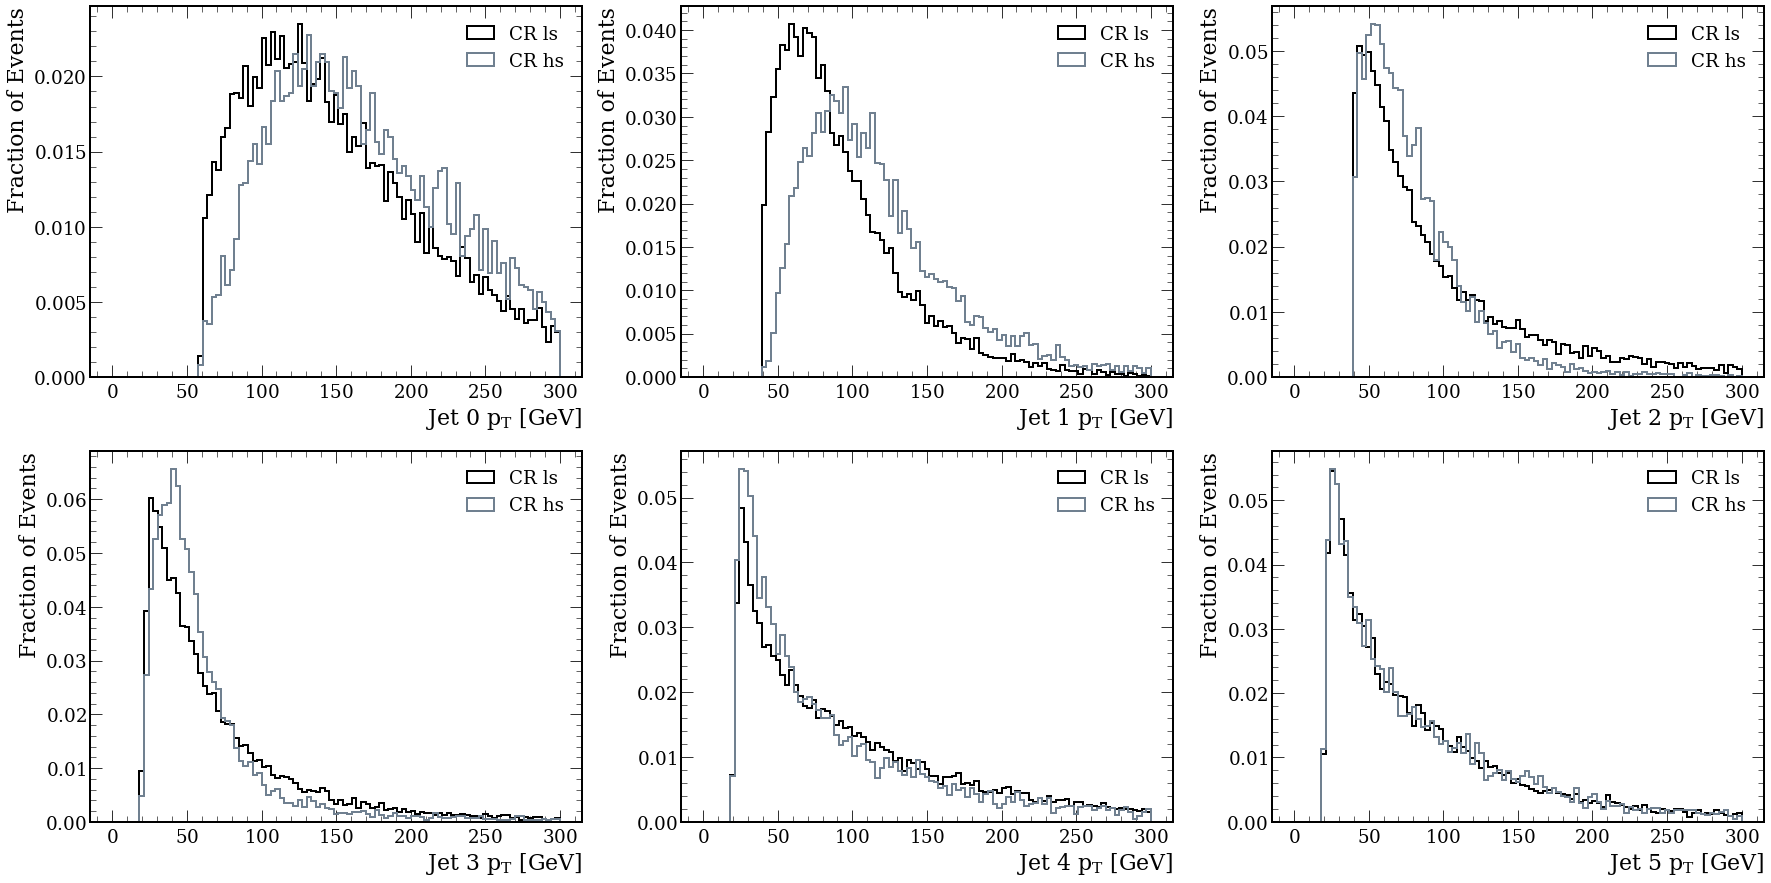

In [18]:
bins = np.linspace(0,300,100)

fig, axs = plt.subplots(figsize=(30,15),nrows=2, ncols=3)

for i,ax in enumerate(axs.flat):
    n, e = Hist(data_tree.t6_jet_pt[data_CRls_mask][:,i], bins=bins, ax=ax, label='CR ls', density=1, color='k')
    n, e = Hist(data_tree.t6_jet_pt[data_CRhs_mask][:,i], bins=bins, ax=ax, label='CR hs', density=1, color='slategrey')
    ax.set_xlabel(rf'Jet {i} $p_T$ [GeV]')
    ax.set_ylabel('Fraction of Events')

fig.savefig(f'plots/data_jet_pt.pdf')

In [19]:
max_mass = 2000

In [20]:
# fig, axs = plt.subplots(figsize=(15,5), nrows=1, ncols=2)

# ax = axs[0]
# n, e = Hist(X.m[data_CRls_mask], bins=np.linspace(0,max_mass,100), label='CR ls', ax=ax, color='k')
# n, e = Hist(X.m[data_CRhs_mask], bins=np.linspace(0,max_mass,100), ax=ax, label='CR hs', color='slategrey')
# ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')
# ax.set_ylabel('Events')

# ax = axs[1]
# n, e = Hist(X.m[data_CRls_mask], bins=np.linspace(0,max_mass,100), label='CR ls', ax=ax, density=1, color='k')
# n, e = Hist(X.m[data_CRhs_mask], bins=np.linspace(0,max_mass,100), ax=ax, label='CR hs', density=1, color='slategrey')
# ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')
# ax.set_ylabel('Events')

# plt.tight_layout()

CRhs and CRls have similar shapes. Yay!

## Estimate sensitivity using mX

In [21]:
mX = int(signal_tree.sample.split(' ')[1])
mY = int(signal_tree.sample.split(' ')[4])

Text(0, 1, 'Events')

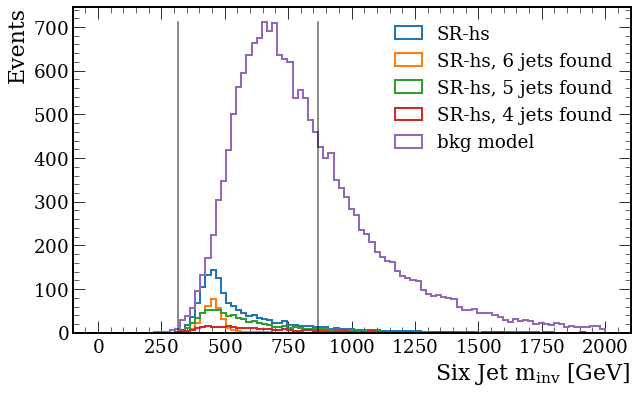

In [67]:
fig, ax = plt.subplots()

xmin = mX - 0.3*mX
xmax = 800 + 0.15*mX
nbins = 100

n, e = Hist(sgnl_X.m[sgnl_SRhs_mask], bins=np.linspace(0,max_mass,nbins), label='SR-hs', scale=signal_tree.scale, ax=ax)
S = n[(e[:-1]>xmin) & (e[:-1]<xmax)].sum()

n, e = Hist(sgnl_X.m[sgnl_SRhs_mask & (ak.sum(signal_tree.t6_jet_signalId > -1, axis=1) == 6)], bins=np.linspace(0,max_mass,nbins), label='SR-hs, 6 jets found', scale=signal_tree.scale, ax=ax)
n, e = Hist(sgnl_X.m[sgnl_SRhs_mask & (ak.sum(signal_tree.t6_jet_signalId > -1, axis=1) == 5)], bins=np.linspace(0,max_mass,nbins), label='SR-hs, 5 jets found', scale=signal_tree.scale, ax=ax)
n, e = Hist(sgnl_X.m[sgnl_SRhs_mask & (ak.sum(signal_tree.t6_jet_signalId > -1, axis=1) == 4)], bins=np.linspace(0,max_mass,nbins), label='SR-hs, 4 jets found', scale=signal_tree.scale, ax=ax)

n, e = np.histogram(X.m[data_SRls_mask].to_numpy(), bins=np.linspace(0,max_mass,nbins))
x = x_bins(e)
n, e = Hist(x, weights=n*TF, bins=np.linspace(0,max_mass,nbins), ax=ax, label='bkg model')
B = n[(e[:-1]>xmin) & (e[:-1]<xmax)].sum()

ax.plot([xmin, xmin], [0, n.max()], color='k', alpha=0.6)
ax.plot([xmax, xmax], [0, n.max()], color='k', alpha=0.6)

ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')
ax.set_ylabel('Events')

# fig.savefig(f'plots/{signal_tree.mXmY}_v_data_minv6.pdf')

In [58]:
bins = np.linspace(0,max_mass,nbins)
n,e = np.histogram(sgnl_X.m[sgnl_SRhs_mask].to_numpy(), bins=bins)
hist1 = np.histogram(sgnl_X.m[sgnl_SRhs_mask].to_numpy(), bins=bins)
hist2 = np.histogram(x_bins(bins), weights=n*signal_tree.scale, bins=bins)
aghast_hist = aghast.from_numpy(hist)

In [63]:
root_hist = aghast.to_root(aghast_hist, "signal_mX")

KeyError: 'sumw2'

Warning in <TROOT::Append>: Replacing existing TH1: h_signal (Potential memory leak).


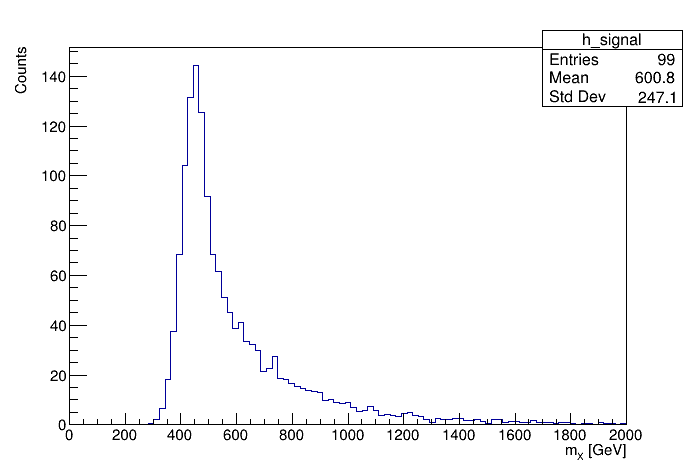

In [66]:
import ROOT
from array import array
canvas = ROOT.TCanvas()
h = ROOT.TH1D("h_signal",";m_{X} [GeV];Counts",len(n),array('d',list(e)))
for i,bin in enumerate(n):
    h.SetBinContent(i+1, bin*signal_tree.scale)

h.Draw()
canvas.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h_data (Potential memory leak).


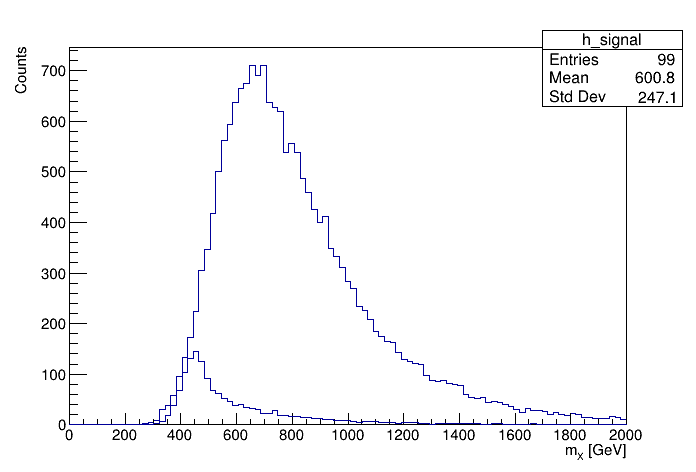

In [69]:
n_data, e = np.histogram(X.m[data_SRls_mask].to_numpy(), bins=np.linspace(0,max_mass,nbins))
h_data = ROOT.TH1D("h_data",";m_{X} [GeV];Counts",len(n),array('d',list(e)))
for i,bin in enumerate(n_data):
    h_data.SetBinContent(i+1, bin*TF)

h_data.Draw()
h.Draw("same")
canvas.Draw()

fout = ROOT.TFile("data_signal_mX.root","recreate")
fout.cd()
h_data.Write()
h.Write()
fout.Close()

In [74]:
1/np.sqrt(12000)

0.009128709291752768

In [23]:
S

1298.2078172588829

In [24]:
ak.sum((sgnl_X.m[sgnl_SRhs_mask] > xmin) & (sgnl_X.m[sgnl_SRhs_mask] < xmax))*signal_tree.scale

1298.2078172588833

In [25]:
ak.sum((sgnl_X.m[sgnl_SRhs_mask] > xmin) & (sgnl_X.m[sgnl_SRhs_mask] < xmax) & (ak.sum(signal_tree.t6_jet_signalId > -1, axis=1) == 5)[sgnl_SRhs_mask])*signal_tree.scale

679.2165076142132

In [26]:
1939/4087

0.4744311230731588

In [27]:
1559/4087

0.38145338879373625

In [70]:
signal_tree.mXmY

'mX_450_mY_300'

In [71]:
sigma = 2*np.sqrt(B)
mu = 2*np.sqrt(B)/S
sensitivity = signal_tree.xsec*mu

In [72]:
print(signal_tree.mXmY)
print(f"    Number of signal events = {int(S)}")
print(f"Number of background events = {int(B)}")
print(f"    Standard Deviation of B = {int(sigma)}")
print(f"                         mu = {mu:.3f}")
print(f"                      limit = {sensitivity:.3f} pb")

mX_450_mY_300
    Number of signal events = 1298
Number of background events = 12024
    Standard Deviation of B = 219
                         mu = 0.169
                      limit = 0.051 pb


In [73]:
lines = [
    signal_tree.mXmY + '\n',
    f"    Number of signal events = {int(S)}\n",
    f"Number of background events = {int(B)}\n",
    f"    Standard Deviation of B = {int(sigma)}\n",
    f"                         mu = {mu:.3f}\n",
    f"                      limit = {sensitivity:.3f} pb"]

In [32]:
with open(f"mass_info/{signal_tree.mXmY}.txt","w") as f:
    f.writelines(lines)